## Oil Price Graph

In [1]:
import quandl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
oil = quandl.get("NSE/OIL", authtoken="vEjGTysiCFBuN-z5bjGP",#insert you api token
                 start_date="1980-01-01",
                 end_date="2020-01-01")

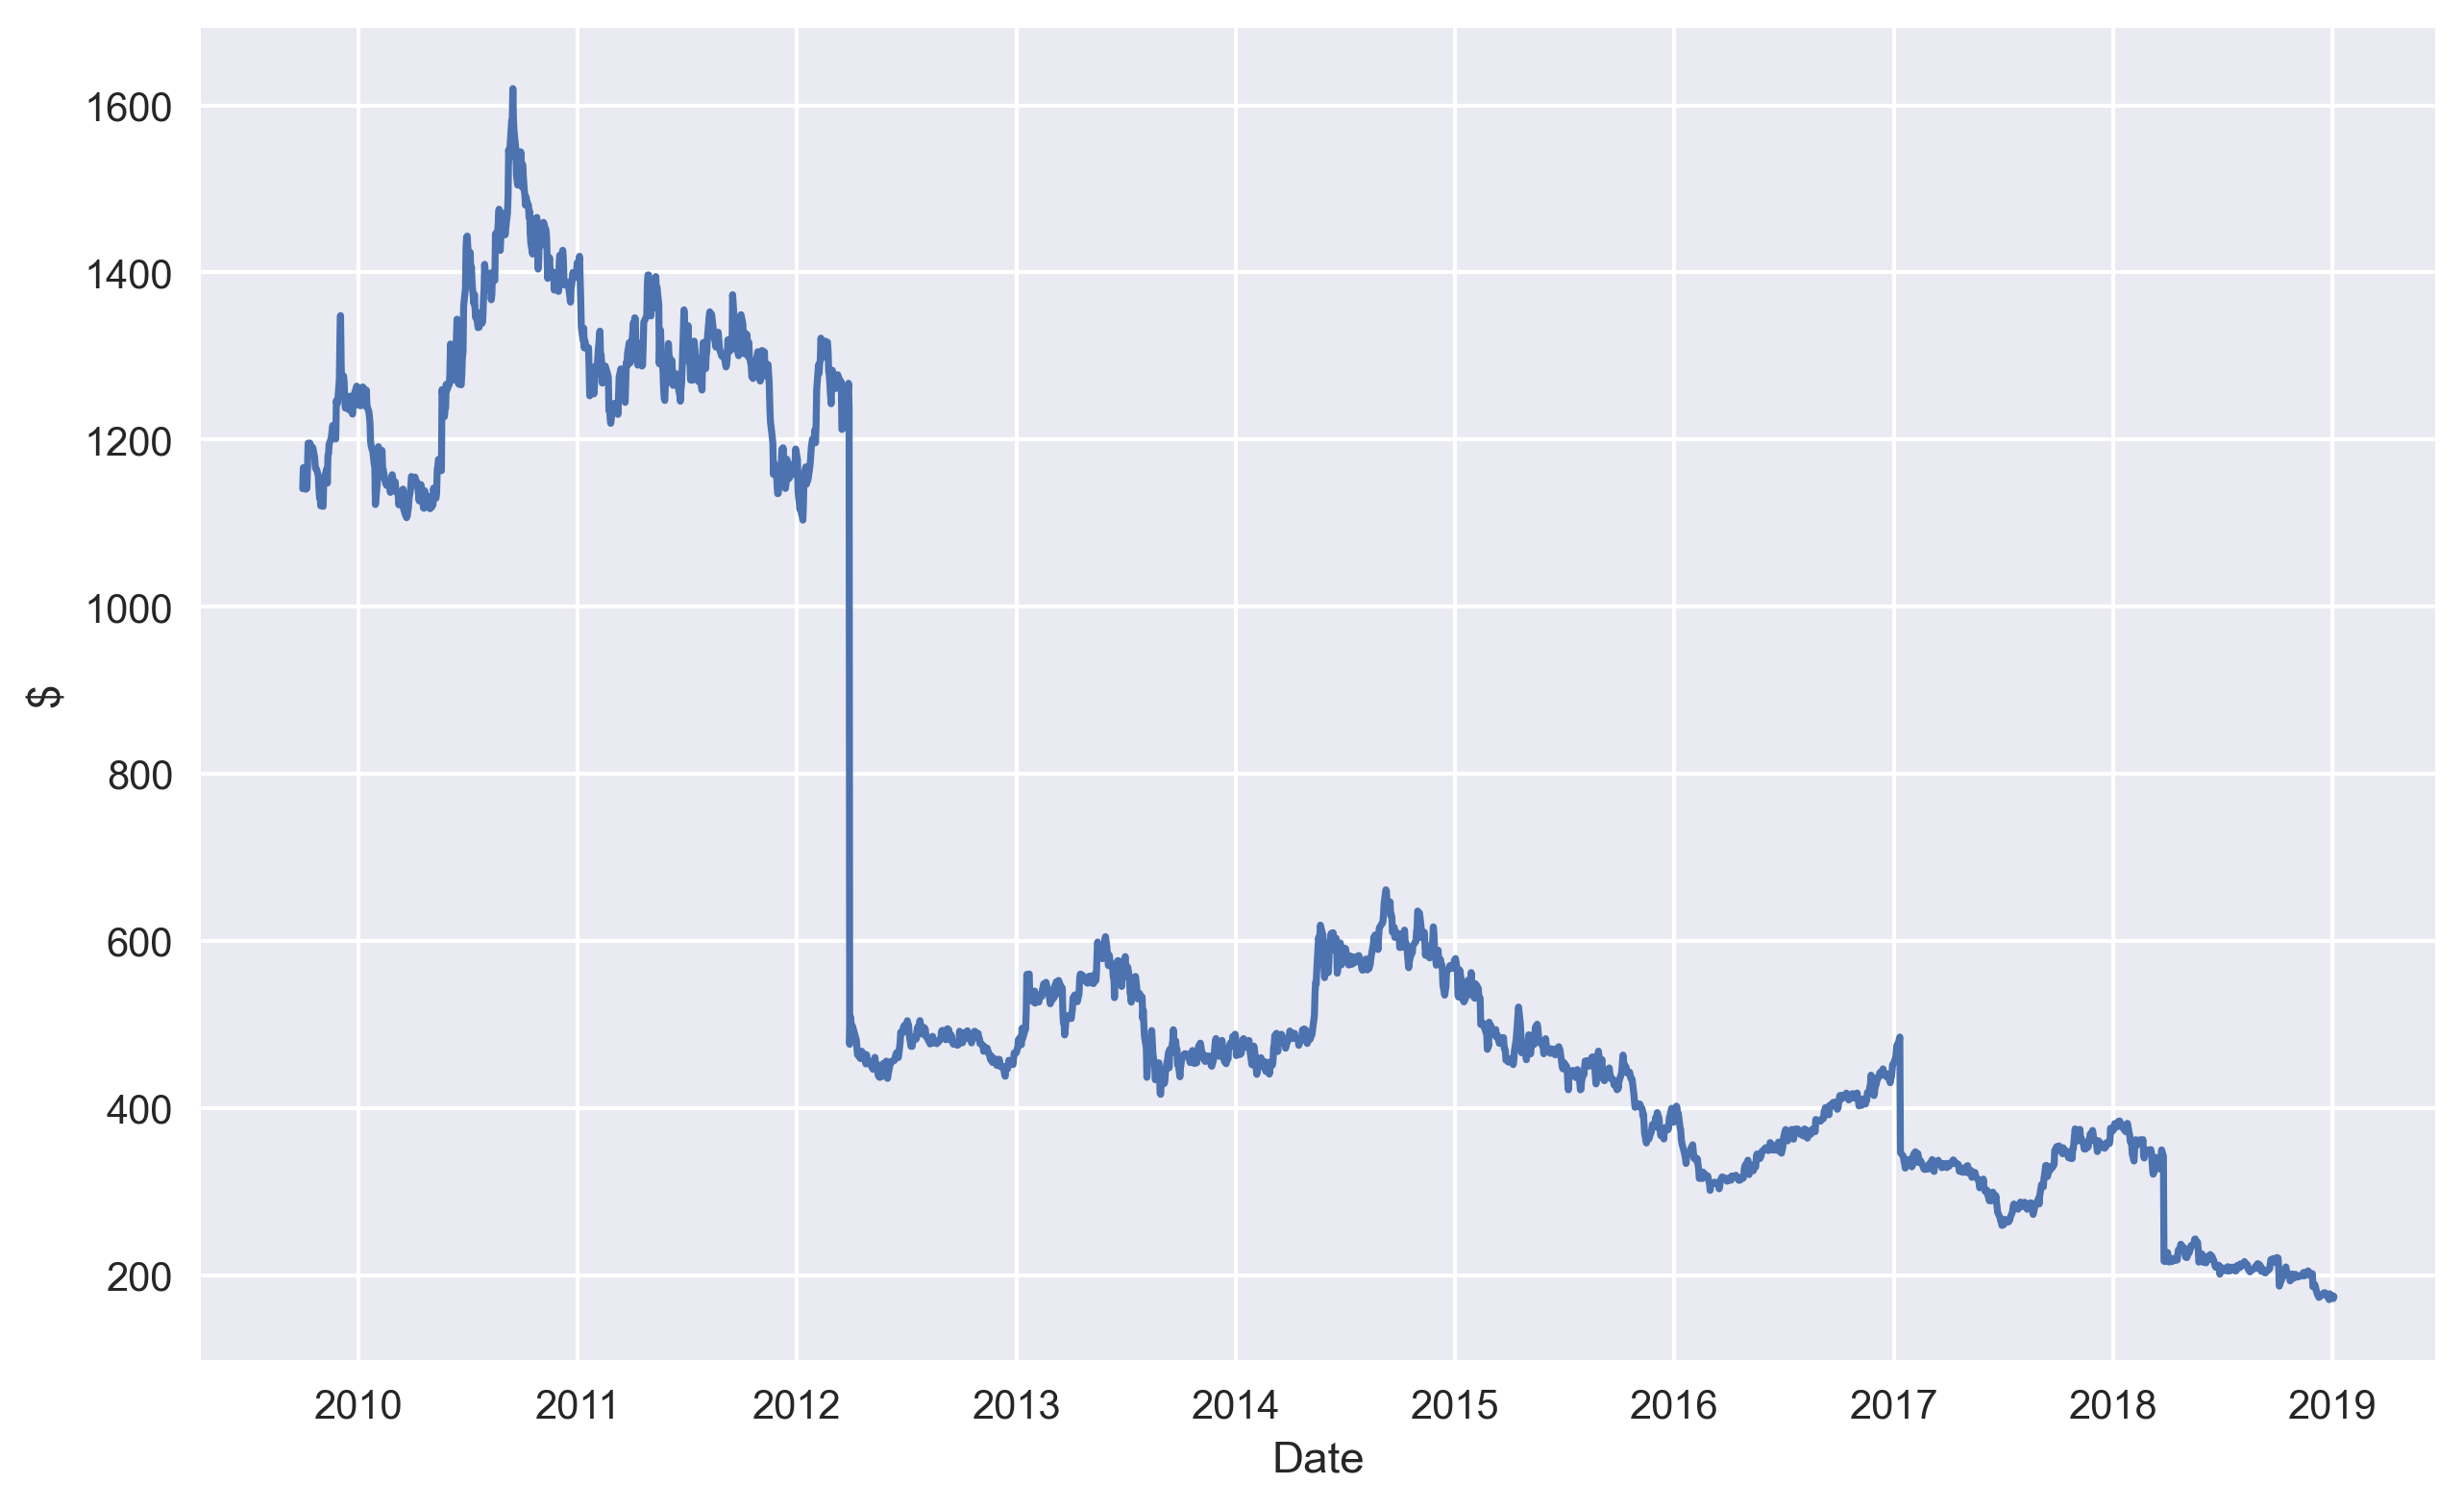

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(oil.Close)
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

## Trend

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
ticker = '^GSPC'
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)
SP_prices = yf.download(ticker, start=start, end=end, interval='1mo')\
            .Close

[*********************100%%**********************]  1 of 1 completed


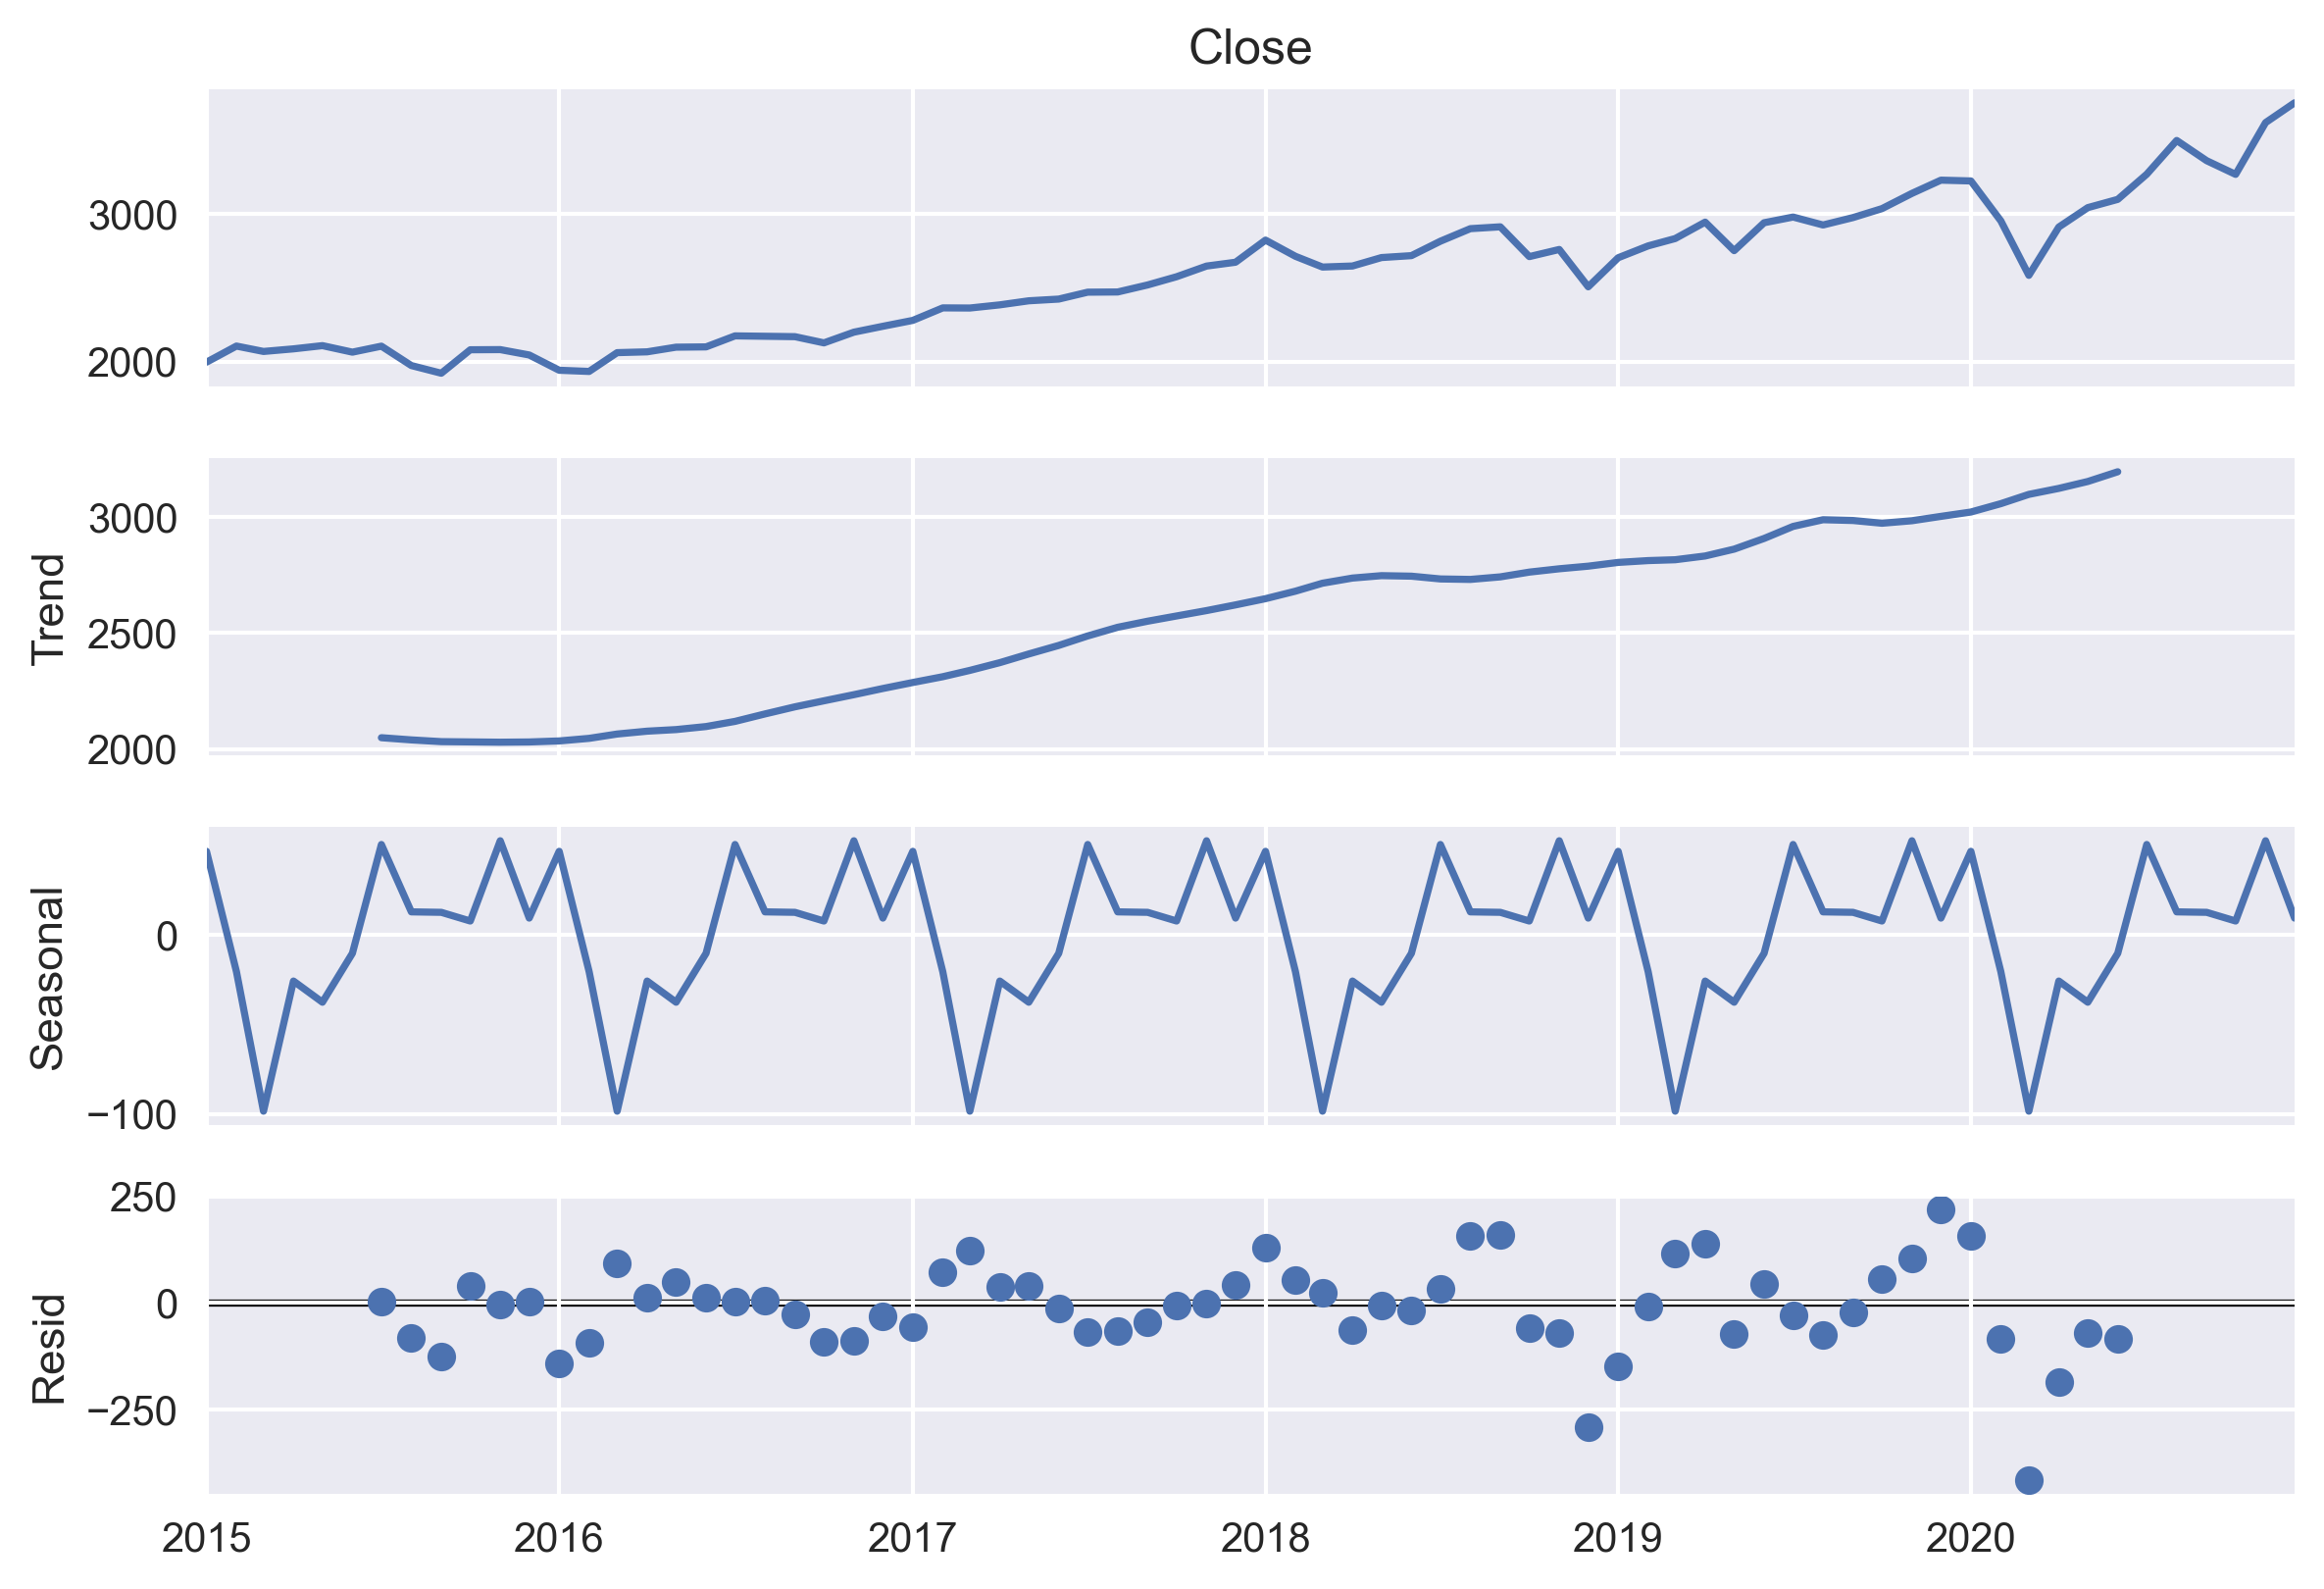

In [6]:
seasonal_decompose(SP_prices, period=12).plot()
plt.show()

## Trend: 추세

- 추세는 주어진 기간 동안 증가 또는 감소하는 일반적인 경향을 나타낸다.
- 일반적으로 추세는 **시작점과 끝점이 다르거나** 시계열에서 **상승/하향 기울기**를 가질 때 나타난다.

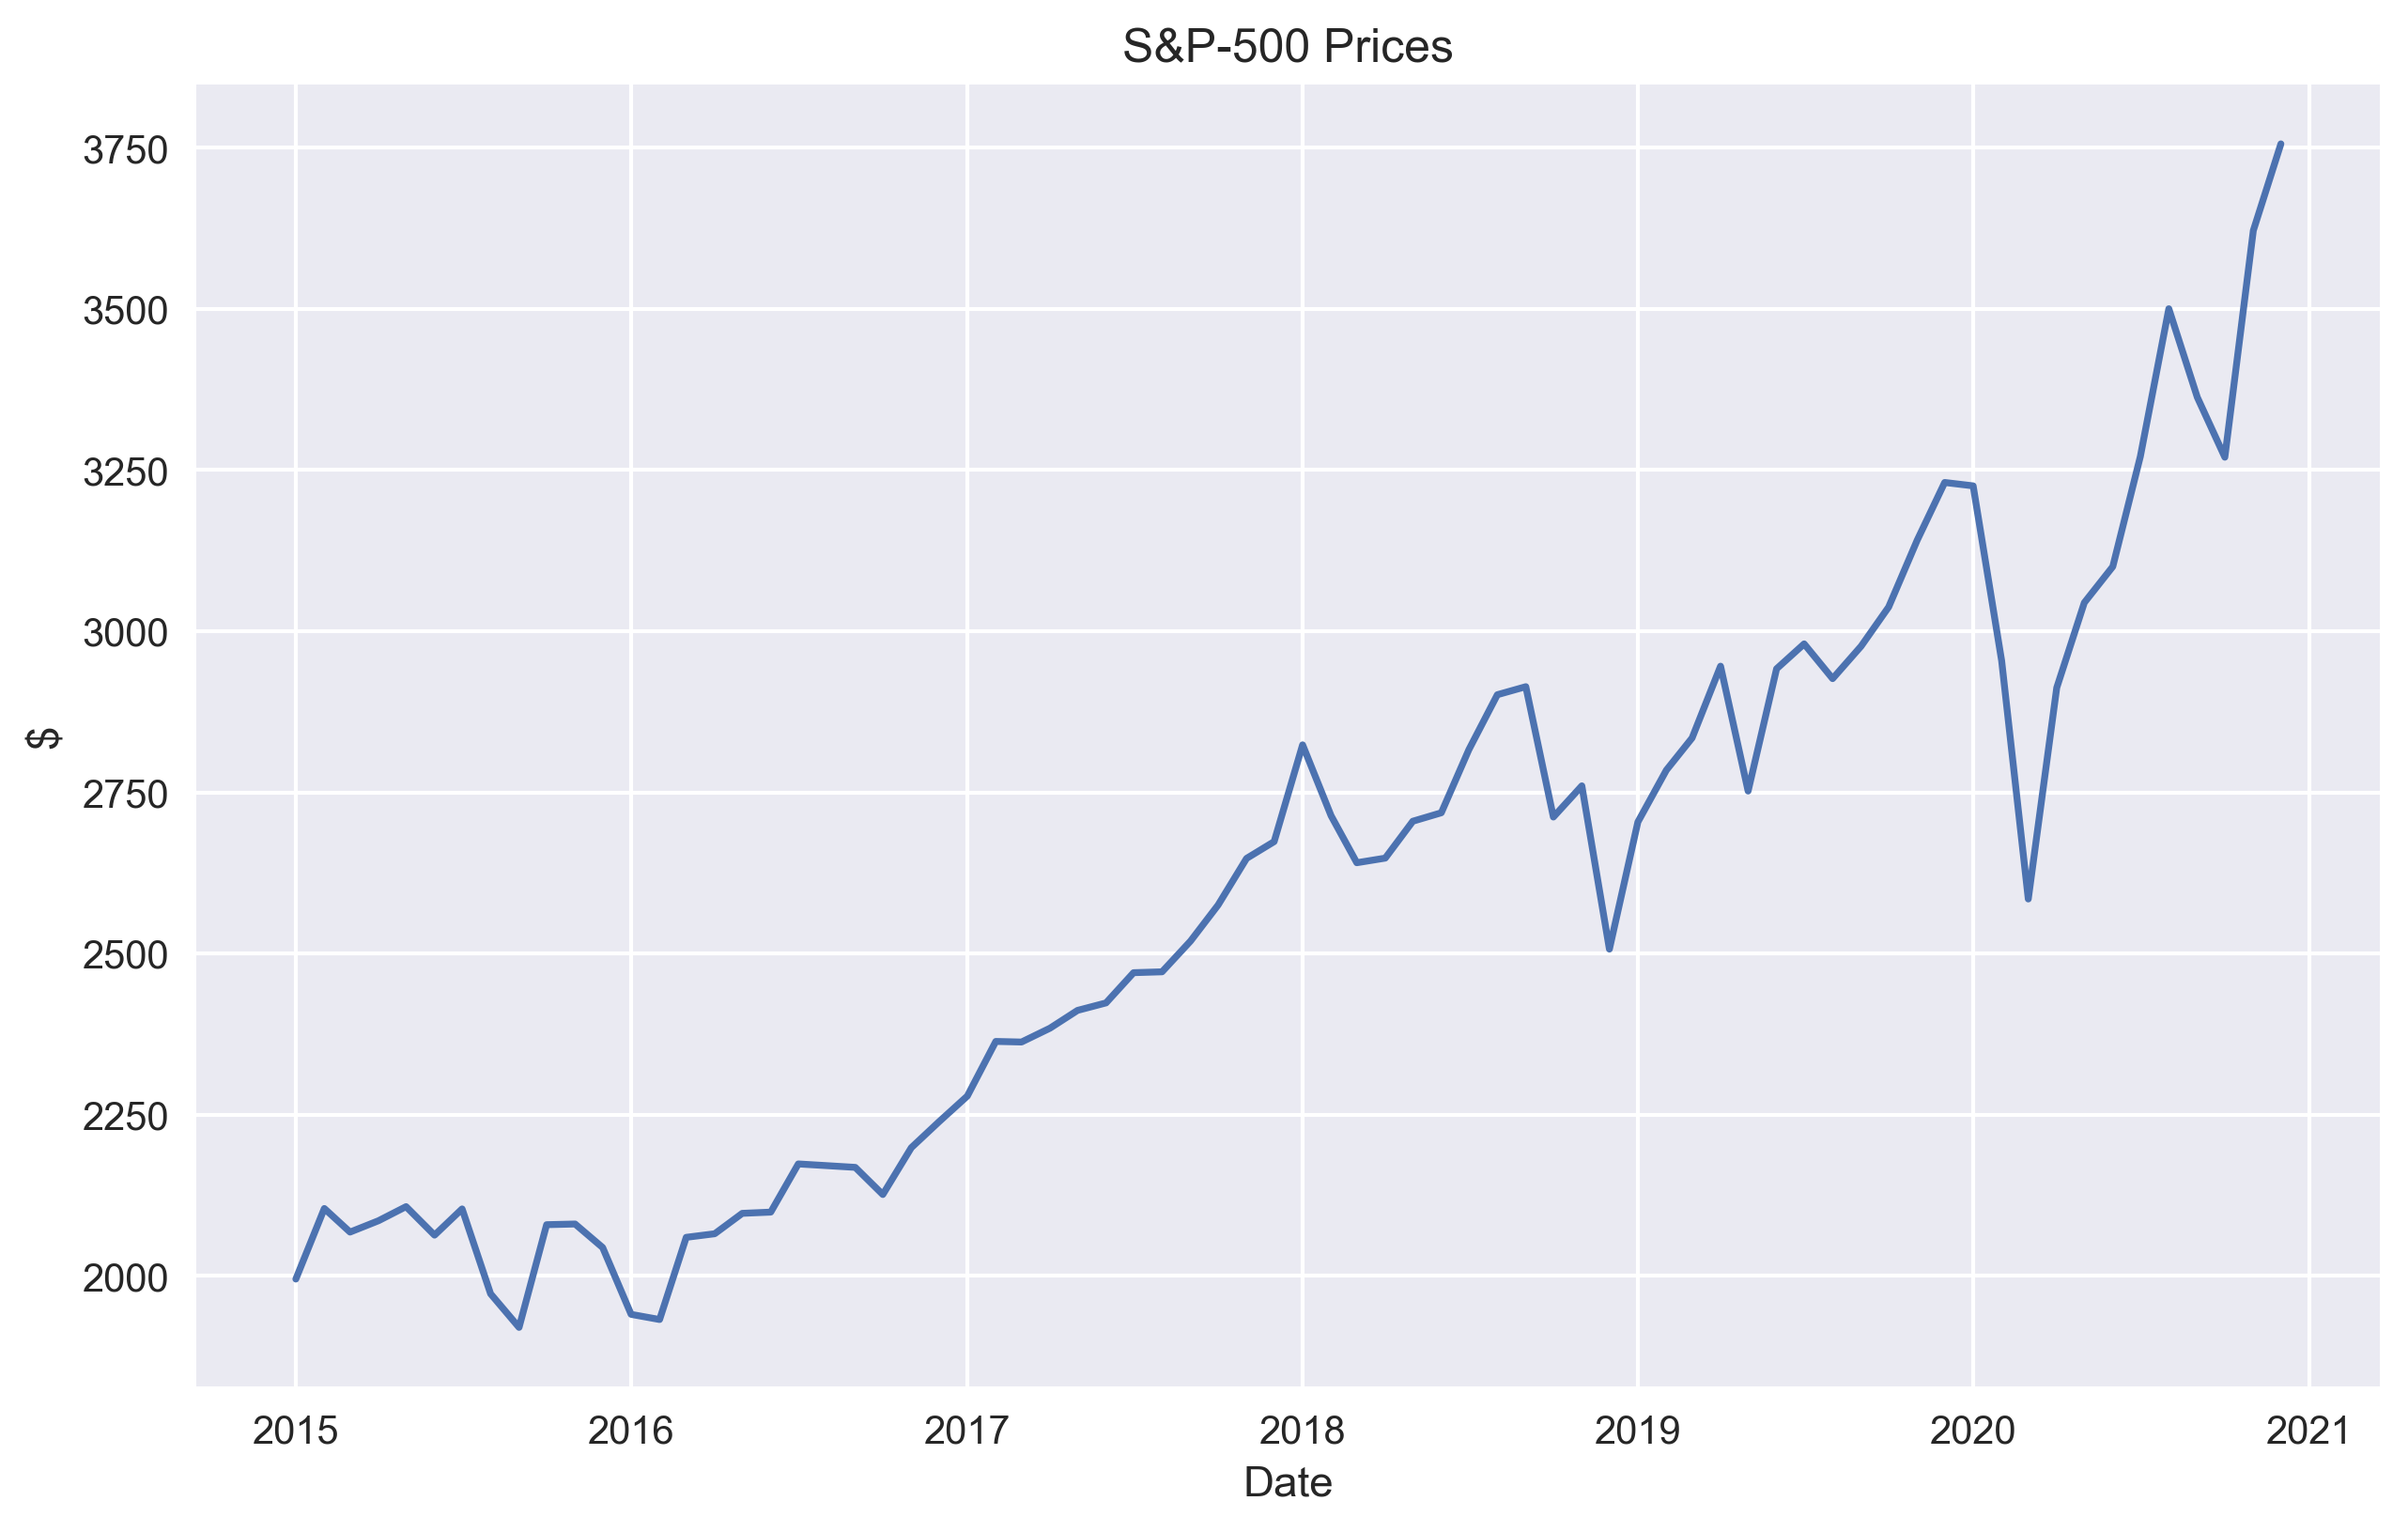

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(SP_prices)
plt.title('S&P-500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

##  Trend:추세를 확인 하는 데 사용할 수 있는 강력한 도구
- 자기 상관 함수
- 부분 자기 상관 함수

### ACF와 MA 모델:

- ACF는 시계열 데이터의 자기상관 관계를 나타내는 함수로, 시차(lag)에 따른 상관성을 보여준다.
- ACF의 빠르게 감소하는 패턴은 시계열 데이터가 이전 지연 값들과 강한 음의 상관관계를 가지고 있다는 것을 나타낼 수 있다.
- 이러한 패턴은 MA(Moving Average) 모델과 관련이 있다. MA 모델은 현재 값이 백색 잡음의 선형 조합으로 이루어진 것으로 가정하며, 이는 ACF에서 빠르게 감소하는 패턴을 보이게 된다.

### PACF와 AR 모델:

- PACF는 현재 값과 특정 시차(lag)의 값 간의 상관성을 나타내는 함수로, 다른 지연 값들의 영향을 제외하고 직접적인 상관성을 보여준다.
- PACF에서 급격히 감소하는 패턴은 AR(AutoRegressive) 모델과 관련이 있다. AR 모델은 현재 값이 이전의 값들의 선형 조합으로 이루어진 것으로 가정하며, 이는 - PACF에서 빠르게 감소하는 패턴을 보이게 된다.

####  자기상관 함수(ACF)는 시계열의 현재 값과 그로부터 지연(lagged) 값 사이의 관계를 분석하는 통계 도구이다.
- 수직선은 상관계수를 나타낸다. 
- 첫 번째 선은 시차가 0인 계열의 상관관계 즉 자기 자신과의 상관관계이다.
- 두 번째 선은 시간 `t-1`과 `t` 사이의 계열 상관관계를 나타낸다.
- 이 ACF 도면에서 선으로 표시되는 상관계수가 천천히 감소하므로 현재 값과 S&P500 데이터의 지연 값 사이에는 강한 의존성이 있는 것으로 보인다.

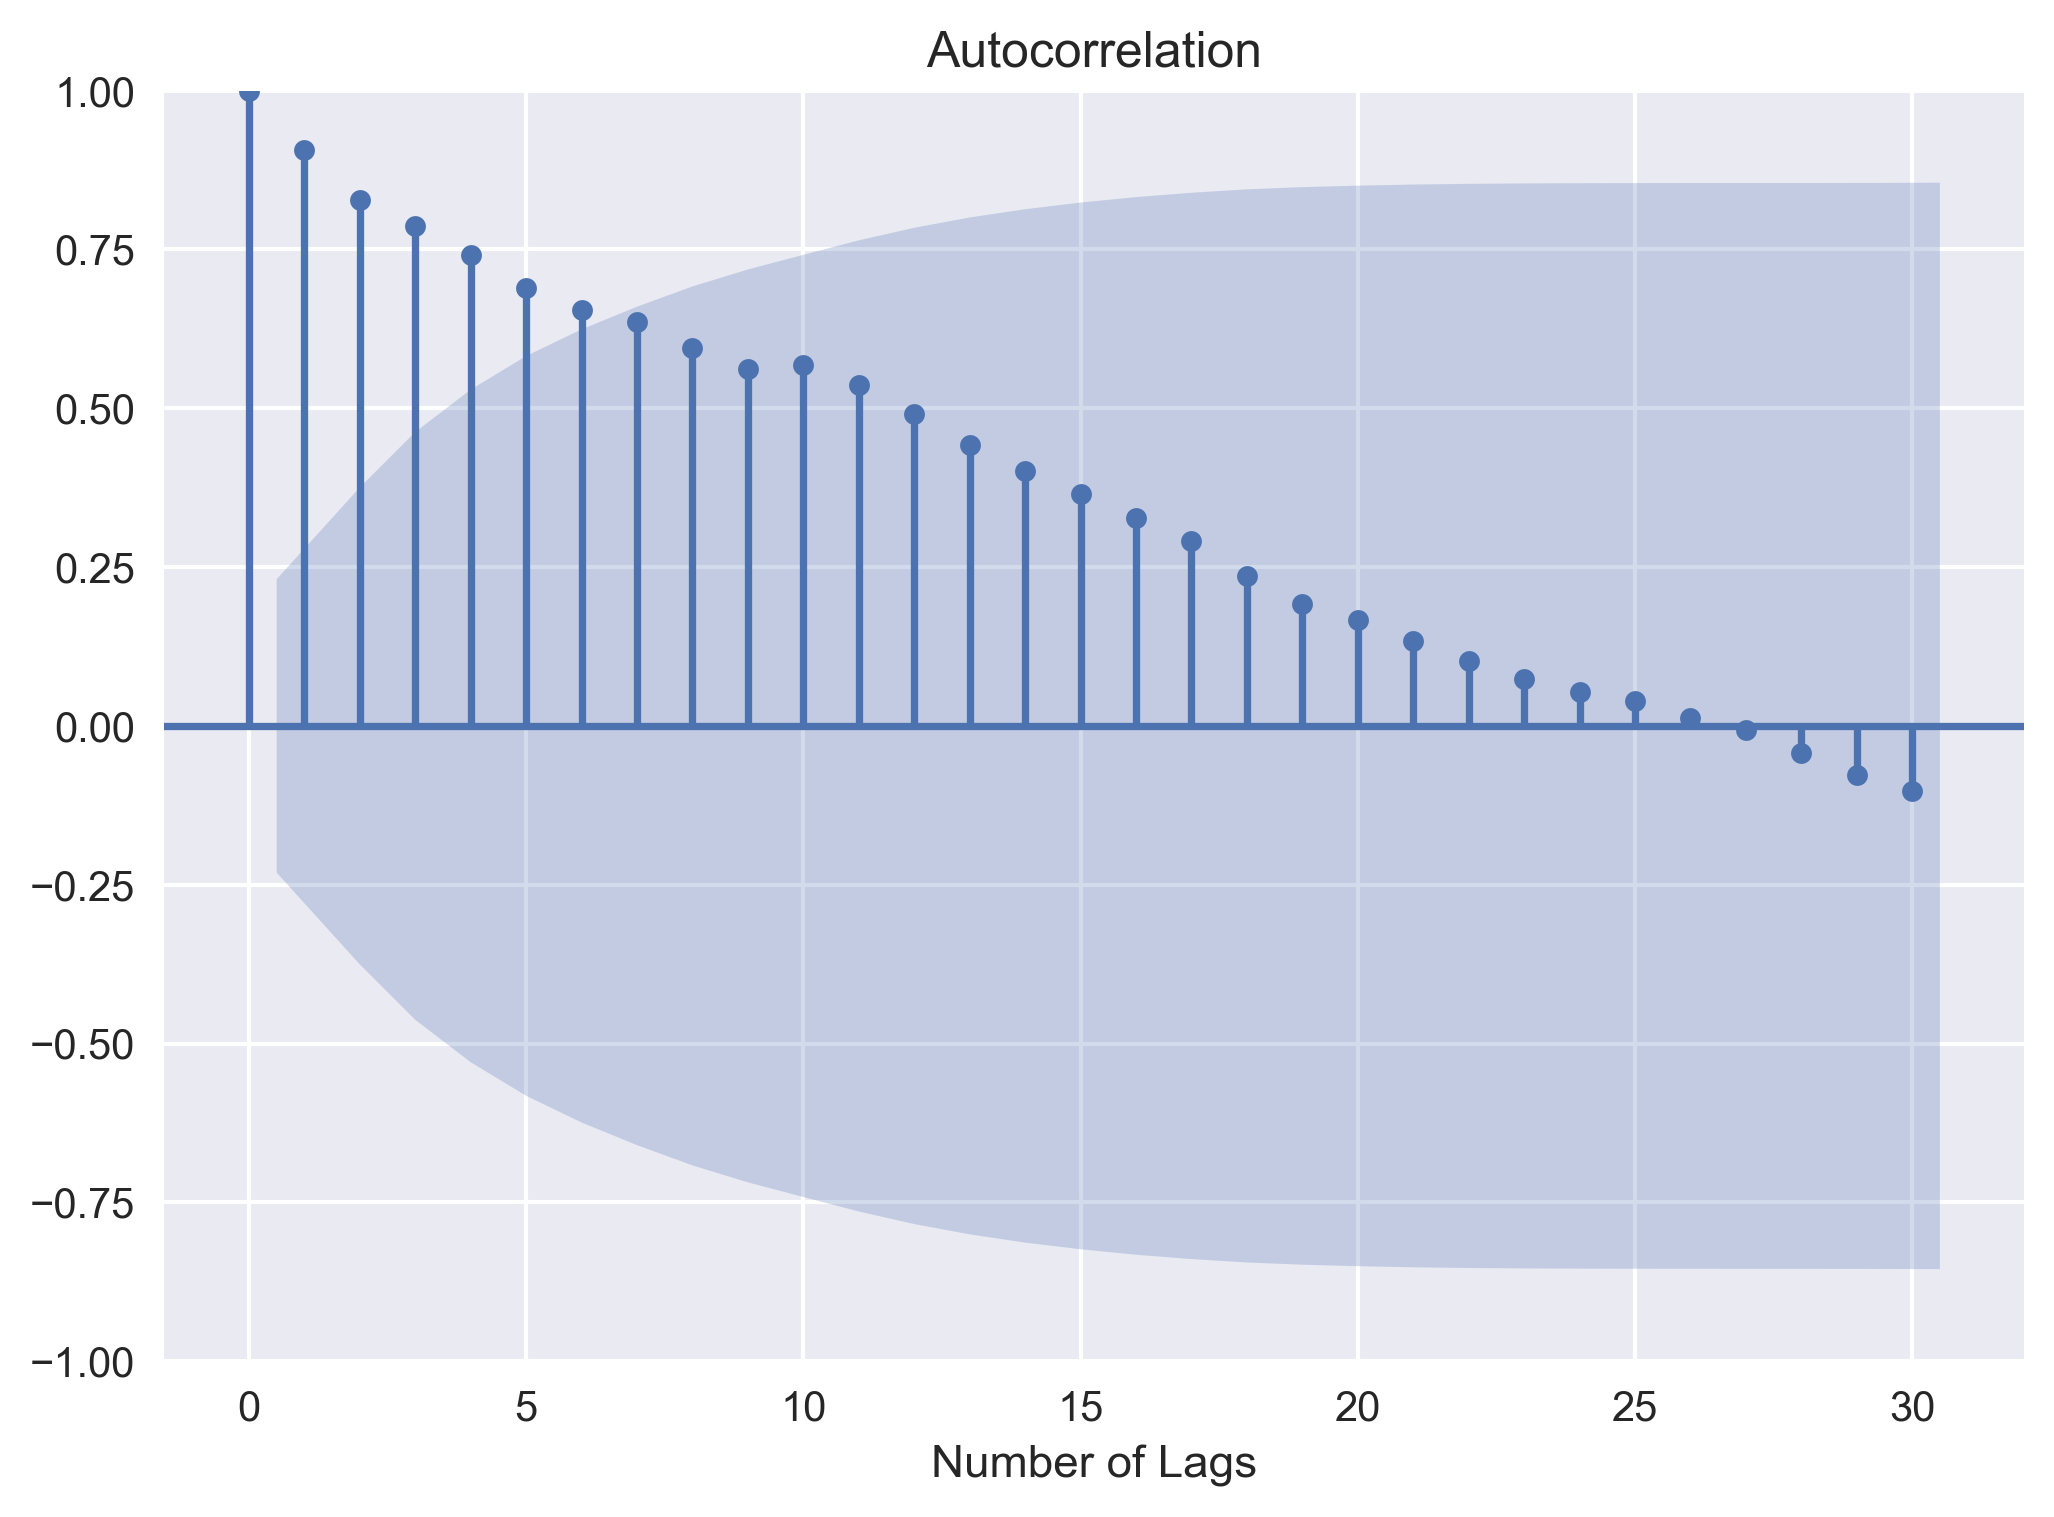

In [8]:
sm.graphics.tsa.plot_acf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

#### 자기상관의 가능성을 가진 원인은 무엇인가?
- 자기상관의 주 원인은 "이월:carryover"이다. 즉 앞서의 관측치가 현재 관측치에 영향을 미친다.
- 잘못된 모델 지정
- 기본적으로 관측치와 실제 값 차이인 측정 오차
- 설명력이 있는 변수의 누락

## 부분 자기상관함수: PACF
- 일반적으로 PACF는 빠르게 감쇠하지 않으면서 0에 가까워지기 때문에 MA(q) 모델에서는 ACF가 유용한 도구로 간주된다.
- ACF의 패턴은 MA에 더 적합하다. 반면 PACF는 AR(p) 프로세스와 잘 작동한다.
- PACF는 시계열의 현재 값과 지연 값 사이의 상관관계에 대한 정보를 제공해 다른 상관관계를 통제한다.
- 다른 상관관계를 통제한다는 표현은 PACF가 특정 지연 값의 영향을 측정하고, 이전 지연 값들의 영향을 제거하여 해당 지연 값과 현재 값 간의 순수한 상관성을 나타낸다는 아이디어를 나타낸다.

- PACF(Partial AutoCorrelation Function)는 시계열 데이터에서 현재 값과 일정 시간 지연된(lagged) 값 사이의 부분 자기상관 관계를 나타내는 함수
- PACF는 전체 자기상관 함수(ACF, AutoCorrelation Function)에서 다른 지연 값들의 영향을 제거하고 현재 값과의 직접적인 상관성을 보여준다.
- "부분"이라는 용어는 다른 지연 값들이 고려되지 않고 현재 값과의 상관성만을 나타낸다는 의미
- PACF는 다른 시간 지연 값들이 현재 값과 간접적으로 관련되어 있는 경우를 제외하고 직접적인 상관성을 보여준다

In [ ]:
- S&P500 데이터의 PACF이다.
- PACF를 해석할 때는, 신뢰구간을 나타내는 어두운 영역 외부의 도출에 초점을 맞춘다.
일부 지연점에서 돌출점이 보이지만 지연 10은 신뢰구간 밖에 있다. 따라서 지연 10까지의 모든 지연을 포함하도록 10인 모델을 선택하는 것이 좋을 수 있다.
PACF는 중간효과를 분리하는 방식으로 계열의 현재 값과 지연 값 

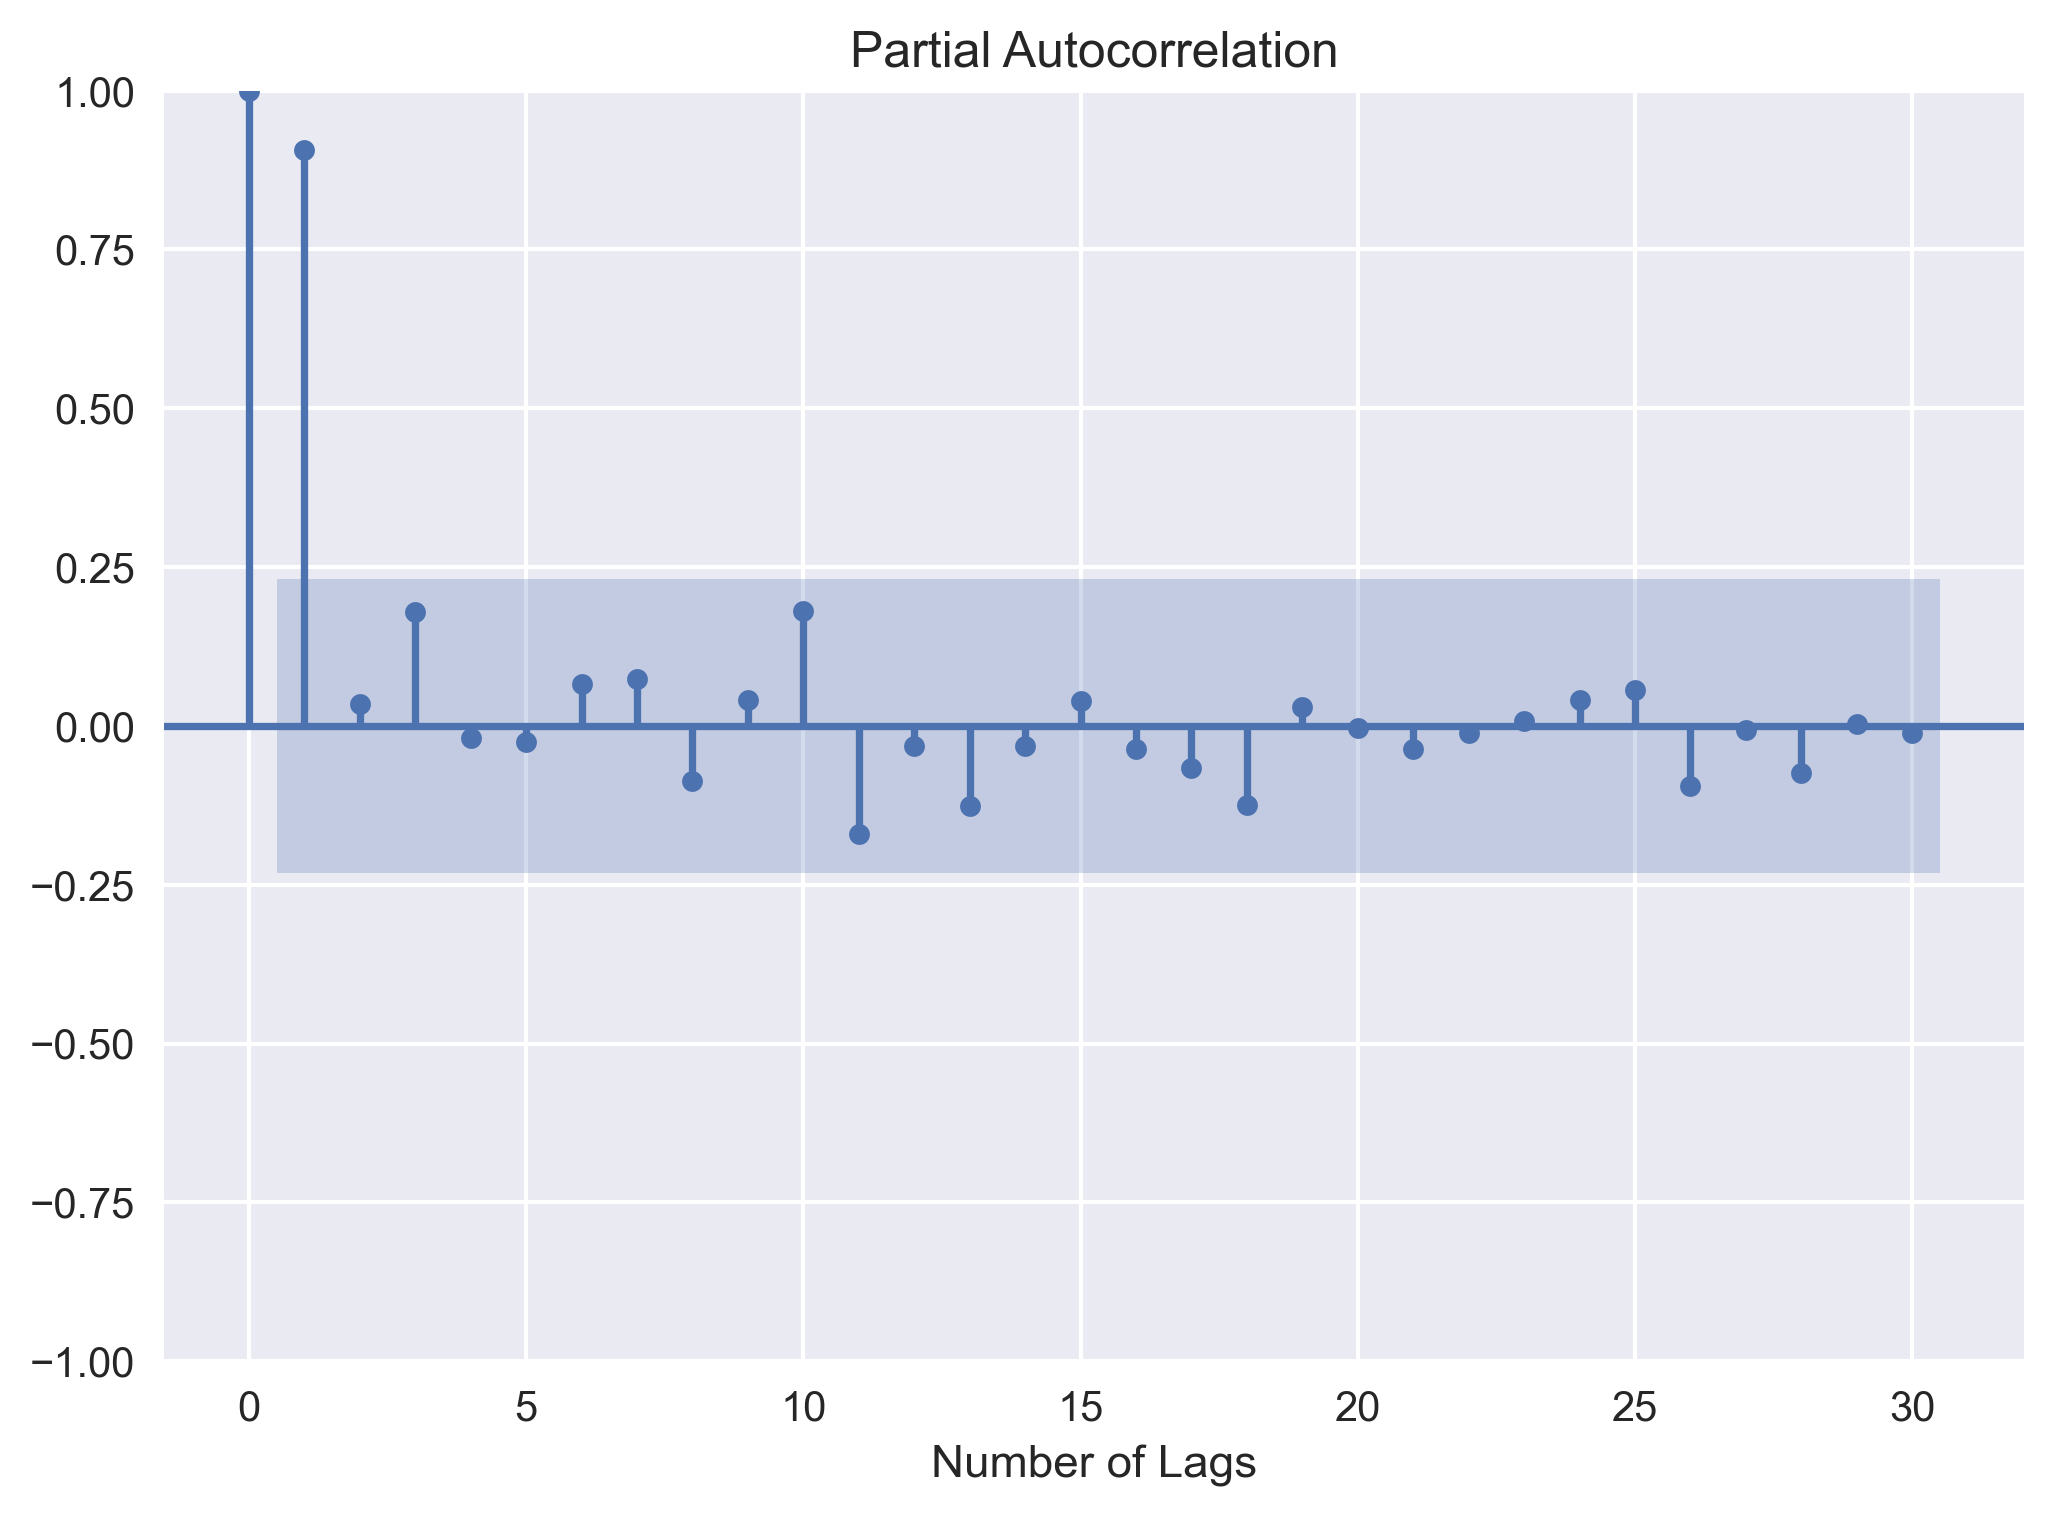

In [9]:
sm.graphics.tsa.plot_pacf(SP_prices, lags=30)
plt.xlabel('Number of Lags')
plt.show()

 ## Seasonality

- 계절성은 주어진 주기 동안 규칙적인 변화가 있는 경우 존재한다.

In [ ]:
from fredapi import Fred
import statsmodels.api as sm

In [ ]:
fred = Fred(api_key='78b14ec6ba46f484b94db43694468bb1')#insert you api key

In [ ]:
energy = fred.get_series("CAPUTLG2211A2S", 
                         observation_start="2010-01-01", 
                         observation_end="2020-12-31")
energy.head(12)

In [ ]:
plt.plot(energy)
plt.title('Energy Capacity Utilization')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(energy, lags=30)
plt.xlabel('Number of Lags')
plt.show()

#### cyclicality: 주기성은 추세보다 높은 주기적 변동이 나타날 때 존재한다. 
- 주기성은 순환을 완료하는 데 오랜 시간이 걸리고 그 기복이 긴 시간에 걸쳐 있는 비즈니스 사이클에 비유할 수 있다.
- 주기성은 변동이 고정된 기간이 아니라는 점에서 계절성과 다르다.
- 주기성의 예로는 모기지 이자율에 따른 주택 구입(또는 판매)을 들 수 있다. 모기지 금리가 인하(또는 인상)되면 주택 구매(또는 판매)가 증가한다.

#### Residual: 잔차
- 잔차는 시계열의 불규칙한 구성 요소이다.
- 기술적으로 잔차란 관측치와 연관된 적합치 사이의 차이와 같다. 모델에 적합화하지 못하고 남은 부분으로 생각할 수 있다.

## Stationarity: 정상성

- 정상성은 시계열의 평균, 분산, 공분산과 같은 통계적 속성이 시간이 지남에 따라 변하지 않는 것을 의미한다.
- 정상성에는 두가지 형태가 있다. 약한 정상성과 강한 정상성이다.
- 약한 정상성은 시계열은 평균이 일정한 유한 분산과 시간차의 함수인 공분산 구조를 가져야한다.
- 강한 정상성은 랜덤 프로세스의 랜덤변수 분포가 시간-인덱스를 이동한 것과 동일함을 의미한다.

#### 왜 정상성이 필요한가?
- 추정 과정에서 시간이 흐름에따라 어느 정도 분포를 갖는 것이 필수적이다.
- 시계열의 분포가 시간이 흐름에 따라 변경되면 예측이 불가능하게 되므로 모델링을 할 수 없게 된다.
- 시계열 모델의 궁극적인 목표는 예측이다. 예측을 위해서는 계수를 추정해야 한다.
- 정상성이 필요한 또 다른 이유는 가정에 따라 일부 통계 모델에서 정상성 데이터가 필요하지만, 그 모델에서 오로지 정상적 데이터만 필요하다는 의미는 아니다.
- 모든 모델에서는 정상성이 필요하지만, 모델에 비정상 데이터를 제공하더라도 일부 모델은 설계에 의해 이를 정상 데이터로 변환해 처리한다.

#### 비정상을 감지하는 방법
- 시각화와 통계적 방법 두 가지가 있다.
- 예를 들어 천천히 감소하는 ACF는 시간에 따른 강한 상관관계를 나타내기 때문에 데이터가 비정상성을 의미한다.
- ADF 테스트는 통계적 방법이다. 매우 낮은 p-값은 데이터가 정상 상태임을 나타낸다.
- 차분을 취하는 것은 정상성을 제거하는 효율적인 기술이다.

In [ ]:
stat_test = adfuller(SP_prices)[0:2]
print("The test statistic and p-value of ADF test are {}"
      .format(stat_test))

In [ ]:
diff_SP_price = SP_prices.diff()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(diff_SP_price)
plt.title('Differenced S&P-500 Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

In [ ]:
sm.graphics.tsa.plot_acf(diff_SP_price.dropna(),lags=30)
plt.xlabel('Number of Lags')
plt.show()

In [ ]:
stat_test2 = adfuller(diff_SP_price.dropna())[0:2]
print("The test statistic and p-value of ADF test after differencing are {}"\
      .format(stat_test2))

In [ ]:
seasonal_index = energy.resample('Q').mean() #분기별 에너지 이용 평균 계산

In [ ]:
dates = energy.index.year.unique()  #계절성 분석을 수행하는 연도 정의
deseasonalized = []
for i in dates:
    for j in range(1, 13):
        deseasonalized.append((energy[str(i)][energy[str(i)]\
                                              .index.month==j]))  #계절 지수 공식의 분자 계산
concat_deseasonalized = np.concatenate(deseasonalized)  #계절성을 없앤 에너지 이용 연결

In [ ]:
deseason_energy = []
for i,s in zip(range(0, len(energy), 3), range(len(seasonal_index))):
    deseason_energy.append(concat_deseasonalized[i:i+3] / 
                           seasonal_index.iloc[s])  #미리 정의된 공식을 사용해 계절 지수 계산
concat_deseason_energy = np.concatenate(deseason_energy)
deseason_energy = pd.DataFrame(concat_deseason_energy, 
                               index=energy.index)
deseason_energy.columns = ['Deaseasonalized Energy']
deseason_energy.head()

In [ ]:
sm.graphics.tsa.plot_acf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

In [ ]:
sm.graphics.tsa.plot_pacf(deseason_energy, lags=10)
plt.xlabel('Number of Lags')
plt.show()

## 시계열 모델링 단계
1. 식별
    - ACF와 PACF를 사용해 데이터를 탐색하고 패턴을 식별하고 통계 검정을 수행한다.
2. 추정
    - 적절한 최적화 기술을 통해 계수를 추정한다.
3. 진단
    - 추정 후에 정보 기준이나 ACF/PACF를 사용해 모델이 유효한지 확인해야 한다.
4. 예측 
    - 추정을 기반으로 미래 가치를 예상한다.

- 시간 차원을 가진 데이터를 모델링 할 때는 인접한 시점의 상관관계를 고려해야 한다.
- 시계열 모델링의 목표는 모델을 적합화하고 시간에 따라 무작위로 변동하는 시계열의 통계적 특성을 이해하는 것이다.

## White Noise

- 통산 백색 잡음 과정은 정상성이며 백색 잡음의 도면은 시간에 따라 무작위 형태로 평균 주변에서 변동된다고 표현한다.
- 백색 잡음은 상관관계가 없는 시퀀스에 의해 형성되므로 예측의 관점에서는매력적인 모델이 아니다.
- 상관되지 않은 시퀀스는 미래 값을 예측하는 것을 방해한다.
- 백색 잡음에 시계열 모델을 실행하기 전에 최적의 지연수를 알아내야 한다. 가장 널리 사용되는 방법은 ACF, PACF, 정보 기준(AIC: 아카이케)이다

In [ ]:
mu = 0
std = 1 
WN = np.random.normal(mu, std, 1000)

plt.plot(WN)
plt.xlabel('Number of Simulations')
plt.show()

## Moving Average

- MA와 잔차는 밀접하게 관련된 모형이다. 
- MA는 잔차의 지연 값을 고려하는 경향이 있으므로 평활 모델로 간주될 수 있다.
- 

In [ ]:
ticker = ['AAPL', 'MSFT']
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)
stock_prices = yf.download(ticker, start, end, interval='1d')\
               .Close

In [ ]:
stock_prices = stock_prices.dropna()

In [ ]:
for i in ticker:
    stat_test = adfuller(stock_prices[i])[0:2]
    print("The ADF test statistic and p-value of {} are {}"\
          .format(i, stat_test))

In [ ]:
diff_stock_prices = stock_prices.diff().dropna()

In [ ]:
split = int(len(diff_stock_prices['AAPL'].values) * 0.95) #데이터를 95%와 5%로 분할
diff_train_aapl = diff_stock_prices['AAPL'].iloc[:split] #95%를 훈련 집합에 할당
diff_test_aapl = diff_stock_prices['AAPL'].iloc[split:] # 테스트에 5%를 할당
diff_train_msft = diff_stock_prices['MSFT'].iloc[:split] #95%를 훈련 집합에 할당
diff_test_msft = diff_stock_prices['MSFT'].iloc[split:]# 테스트에 5%를 할당

In [ ]:
diff_train_aapl.to_csv('diff_train_aapl.csv')
diff_test_aapl.to_csv('diff_test_aapl.csv')
diff_train_msft.to_csv('diff_train_msft.csv')
diff_test_msft.to_csv('diff_test_msft.csv')

- ACF 그래프에서 돌파선이 있으면 이 부분은 lag로 선택할 수 있다.
- 짧은 구간에 나타난 것은 단기로 이후 나타나는 부분은 중기 또는 장기로 볼 수 있다.

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
plt.tight_layout() 
sm.graphics.tsa.plot_acf(diff_train_aapl,lags=30,
                         ax=ax[0], title='ACF - Apple')
sm.graphics.tsa.plot_acf(diff_train_msft,lags=30,
                         ax=ax[1], title='ACF - Microsoft')
plt.show()

In [ ]:
short_moving_average_appl = diff_train_aapl.rolling(window=9).mean()
long_moving_average_appl = diff_train_aapl.rolling(window=22).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_aapl.loc[start:end].index, 
        diff_train_aapl.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_appl.loc[start:end].index, 
        short_moving_average_appl.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_appl.loc[start:end].index, 
        long_moving_average_appl.loc[start:end],
        label = 'Long MA', linestyle='solid')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_title('Stock Prediction-Apple')
plt.show()

In [ ]:
short_moving_average_msft = diff_train_msft.rolling(window=2).mean()
long_moving_average_msft = diff_train_msft.rolling(window=22).mean()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(diff_train_msft.loc[start:end].index,
        diff_train_msft.loc[start:end],
        label='Stock Price', linestyle='--')
ax.plot(short_moving_average_msft.loc[start:end].index,
        short_moving_average_msft.loc[start:end],
        label = 'Short MA', linestyle='solid')
ax.plot(long_moving_average_msft.loc[start:end].index,
        long_moving_average_msft.loc[start:end],
        label = 'Long MA', linestyle='-.')
ax.legend(loc='best')
ax.set_ylabel('Differenced Price')
ax.set_xlabel('Date')
ax.set_title('Stock Prediction-Microsoft')
plt.show()

## Autoregressive Model

- 현재 값 자체의 지연값에 대해 회귀된다.
- AR(p) 모델은 p차까지의 과거 값이 Xt에 대해 어느 정도 설명력을 갖는다는 것을 의미한다.
- MA는 무한 AR 프로세스로 작성될수 있다. 이러한 상황은 정상 공분산 구조, 확정적 부분 및가역 MA 과정을 가진다.
- AR과 MA 프로세스 간의 이중성으로 인해 AR(1)을 무한 MA, 즉 MA(무한대)로 표현할 수 있다. 즉, AR(1) 프로세스는 과저 값의 함수로 표현될 수 있다. 

In [ ]:
sm.graphics.tsa.plot_pacf(diff_train_aapl, lags=30)
plt.title('PACF of Apple')
plt.xlabel('Number of Lags')
plt.show()

In [ ]:
sm.graphics.tsa.plot_pacf(diff_train_msft, lags=30)
plt.title('PACF of Microsoft')
plt.xlabel('Number of Lags')
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ar_aapl = AutoReg(diff_train_aapl.values, lags=29)
ar_fitted_aapl = ar_aapl.fit()

In [ ]:
ar_predictions_aapl = ar_fitted_aapl.predict(start=len(diff_train_aapl), 
                                             end=len(diff_train_aapl)\
                                             + len(diff_test_aapl) - 1, 
                                             dynamic=False)

In [ ]:
for i in range(len(ar_predictions_aapl)):
    print('==' * 25)
    print('predicted values:{:.4f} & actual values:{:.4f}'\
          .format(ar_predictions_aapl[i], diff_test_aapl[i]))

In [ ]:
ar_predictions_aapl = pd.DataFrame(ar_predictions_aapl)
ar_predictions_aapl.index = diff_test_aapl.index

In [ ]:
ar_msft = AutoReg(diff_train_msft.values, lags=26)
ar_fitted_msft = ar_msft.fit()

In [ ]:
ar_predictions_msft = ar_fitted_msft.predict(start=len(diff_train_msft), 
                                             end=len(diff_train_msft)\
                                             +len(diff_test_msft) - 1,
                                             dynamic=False)

In [ ]:
ar_predictions_msft = pd.DataFrame(ar_predictions_msft)
ar_predictions_msft.index = diff_test_msft.index

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(ar_predictions_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(ar_predictions_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

## ARIMA Model

- ARIMA는 시계열의 과거 값과 백색 잡음의 함수이다.
- ARIMA에는 p,d,q 매개변수가 있다. p,q는 각각 AR과 MA의 차수를 나타낸다. d 매개변수는 차분 차이는 제어한다.
#### 장점
- ARIMA를 사용하면 정상성 데이터인지 여부를 고려하지 않고, 원시 데이터로 작업할 수 있다.
- 고빈도 데이터에 잘 작동한다.
- 다른 모델에 비해 데이터의 변동에 덜 민감하다.
#### 단점
- ARIMA는 계절성을 포착하지 못할 수 있다.
- 긴 계열과 단기(일별, 시간별) 데이터에서 더 잘 동작한다.
- ARIMA에서는 자동 갱신이 발생하지 않으므로 분석 중에 구조적 변화가 없어야 한다.
- ARIMA 프로세스를 조정하지 않으면 불안정해진다.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
split = int(len(stock_prices['AAPL'].values) * 0.95)
train_aapl = stock_prices['AAPL'].iloc[:split]
test_aapl = stock_prices['AAPL'].iloc[split:]
train_msft = stock_prices['MSFT'].iloc[:split]
test_msft = stock_prices['MSFT'].iloc[split:]

In [ ]:
arima_aapl = ARIMA(train_aapl,order=(9, 1, 9))
arima_fit_aapl = arima_aapl.fit()

In [ ]:
arima_msft = ARIMA(train_msft, order=(6, 1, 6))
arima_fit_msft = arima_msft.fit()

In [ ]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl), 
                                                  end=len(train_aapl)\
                                                  + len(test_aapl) - 1, 
                                                  dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft), 
                                                  end=len(train_msft)\
                                                  + len(test_msft) - 1, 
                                                  dynamic=False)

In [ ]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Applea')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()


In [ ]:
import itertools

In [ ]:
p = q = range(0, 9)  #AR 및 MA 1차수 범위 정의
d = range(0, 3) # 차분항 범위 정의
pdq = list(itertools.product(p, d, q)) #p,d,q에 대해 반복 적용
arima_results_aapl = []
for param_set in pdq:
    try:
        arima_aapl = ARIMA(train_aapl, order=param_set)
        arima_fitted_aapl = arima_aapl.fit()
        arima_results_aapl.append(arima_fitted_aapl.aic)
    except:
        continue
print('**'*25)
print('The Lowest AIC score is {:.4f} and the corresponding parameters are {}'
      .format(pd.DataFrame(arima_results_aapl)
             .where(pd.DataFrame(arima_results_aapl).T.notnull().all()).min()[0], 
             pdq[arima_results_aapl.index(min(arima_results_aapl))])) #가장 낮은 AIC 갑 출력

In [ ]:
arima_aapl = ARIMA(train_aapl, order=(4, 1, 4)) #최적 차수로 ARIMA 모델 구성 및 적합화
arima_fit_aapl = arima_aapl.fit()

In [ ]:
p = q = range(0, 6)
d = range(0, 3)
pdq = list(itertools.product(p, d, q))
arima_results_msft = []
for param_set in pdq:
    try:
        arima_msft = ARIMA(stock_prices['MSFT'], order=param_set)
        arima_fitted_msft = arima_msft.fit()
        arima_results_msft.append(arima_fitted_msft.aic)
    except:
        continue
print('**' * 25)
print('The lowest AIC score is {:.4f} and parameters are {}'
      .format(pd.DataFrame(arima_results_msft)
              .where(pd.DataFrame(arima_results_msft).T.notnull()\
                     .all()).min()[0], 
              pdq[arima_results_msft.index(min(arima_results_msft))]))

In [ ]:
arima_msft = ARIMA(stock_prices['MSFT'], order=(4, 2 ,4))
arima_fit_msft= arima_msft.fit()

In [ ]:
arima_predict_aapl = arima_fit_aapl.predict(start=len(train_aapl), 
                                                  end=len(train_aapl)\
                                                  +len(test_aapl) - 1, 
                                                  dynamic=False)
arima_predict_msft = arima_fit_msft.predict(start=len(train_msft), 
                                                  end=len(train_msft)\
                                                  + len(test_msft) - 1, 
                                                  dynamic=False)

In [ ]:
arima_predict_aapl = pd.DataFrame(arima_predict_aapl)
arima_predict_aapl.index = diff_test_aapl.index
arima_predict_msft = pd.DataFrame(arima_predict_msft)
arima_predict_msft.index = diff_test_msft.index

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18, 15))
 
ax[0].plot(diff_test_aapl, label='Actual Stock Price', linestyle='--')
ax[0].plot(arima_predict_aapl, linestyle='solid', label="Prediction")
ax[0].set_title('Predicted Stock Price-Apple')
ax[0].legend(loc='best')
ax[1].plot(diff_test_msft, label='Actual Stock Price', linestyle='--')
ax[1].plot(arima_predict_msft, linestyle='solid', label="Prediction")
ax[1].set_title('Predicted Stock Price-Microsoft')
ax[1].legend(loc='best')
for ax in ax.flat:
    ax.set(xlabel='Date', ylabel='Differenced Price')
plt.show()

- ARIMA는 차수를 잘못 식별하면 적합도가 떨어지고 결과적으로 만족스럽지 못한 예측이 생성된다.